In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
%matplotlib inline

In [22]:
test = pd.read_csv("dataset/test.csv")
train = pd.read_csv("dataset/train.csv")

In [23]:
print("Size of training data:")
print(train.shape)
print ("Size of test data: ")
print(test.shape)

Size of training data:
(1460, 81)
Size of test data: 
(1459, 80)


In [24]:
categorical_cols = [entry for entry in train.columns if train.dtypes[entry] == 'object']
numerical_cols = [entry for entry in train.columns if train.dtypes[entry] != 'object']

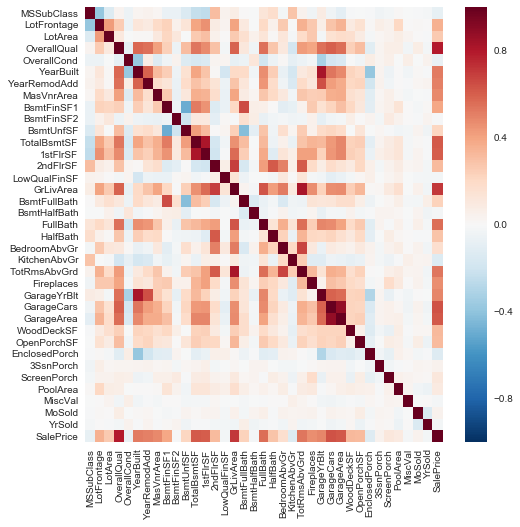

In [33]:
correlation_matrix = train.select_dtypes(include=['float64', 'int64']).iloc[:,1:].corr()
fig, ax = plt.subplots(figsize=(8, 8))

sns.heatmap(correlation_matrix)

In [36]:
correlationDict = correlation_matrix['SalePrice'].to_dict()
for element in sorted(correlationDict.items(), key = lambda l: -abs(l[1])):
    print(str(element[0]) + ": \t" + str(element[1]))

SalePrice: 	1.0
OverallQual: 	0.790981600584
GrLivArea: 	0.708624477613
GarageCars: 	0.640409197258
GarageArea: 	0.623431438918
TotalBsmtSF: 	0.613580551559
1stFlrSF: 	0.605852184692
FullBath: 	0.560663762748
TotRmsAbvGrd: 	0.533723155582
YearBuilt: 	0.522897332879
YearRemodAdd: 	0.507100967111
GarageYrBlt: 	0.486361677488
MasVnrArea: 	0.477493047096
Fireplaces: 	0.466928836752
BsmtFinSF1: 	0.386419806242
LotFrontage: 	0.351799096571
WoodDeckSF: 	0.324413444568
2ndFlrSF: 	0.319333802832
OpenPorchSF: 	0.315856227116
HalfBath: 	0.284107675595
LotArea: 	0.263843353871
BsmtFullBath: 	0.227122233131
BsmtUnfSF: 	0.214479105547
BedroomAbvGr: 	0.168213154301
KitchenAbvGr: 	-0.135907370842
EnclosedPorch: 	-0.128577957926
ScreenPorch: 	0.111446571143
PoolArea: 	0.0924035494919
MSSubClass: 	-0.0842841351266
OverallCond: 	-0.0778558940487
MoSold: 	0.0464322452238
3SsnPorch: 	0.0445836653357
YrSold: 	-0.0289225851687
LowQualFinSF: 	-0.0256061300007
MiscVal: 	-0.0211895796403
BsmtHalfBath: 	-0.01684

In [37]:
test.drop(['BsmtHalfBath','BsmtFinSF2'],axis=1)
train.drop(['BsmtHalfBath','BsmtFinSF2'],axis=1)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
5        6          50       RL         85.0    14115   Pave   NaN      IR1   
6        7          20       RL         75.0    10084   Pave   NaN      Reg   
7        8          60       RL          NaN    10382   Pave   NaN      IR1   
8        9          50       RM         51.0     6120   Pave   NaN      Reg   
9       10         190       RL         50.0     7420   Pave   NaN      Reg   
10      11          20       RL         70.0    11200   Pave   NaN      Reg   
11      12          60       RL         85.0    11924   Pave   NaN      IR1   
12      13          20       RL          NaN    12968   Pave   NaN      IR2   
13      14          20       RL         91.0    10652   Pave   NaN      IR1   
14      15          20       RL          NaN    10920   Pave   NaN      IR1   
15      16          45       RM         51.0     6120   Pave   NaN      Reg   
16      17          20       RL          NaN    11241   Pave   NaN      IR1   
17      18          90       RL         72.0    10791   Pave   NaN      Reg   
18      19          20       RL         66.0    13695   Pave   NaN      Reg   
19      20          20       RL         70.0     7560   Pave   NaN      Reg   
20      21          60       RL        101.0    14215   Pave   NaN      IR1   
21      22          45       RM         57.0     7449   Pave  Grvl      Reg   
22      23          20       RL         75.0     9742   Pave   NaN      Reg   
23      24         120       RM         44.0     4224   Pave   NaN      Reg   
24      25          20       RL          NaN     8246   Pave   NaN      IR1   
25      26          20       RL        110.0    14230   Pave   NaN      Reg   
26      27          20       RL         60.0     7200   Pave   NaN      Reg   
27      28          20       RL         98.0    11478   Pave   NaN      Reg   
28      29          20       RL         47.0    16321   Pave   NaN      IR1   
29      30          30       RM         60.0     6324   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1430  1431          60       RL         60.0    21930   Pave   NaN      IR3   
1431  1432         120       RL          NaN     4928   Pave   NaN      IR1   
1432  1433          30       RL         60.0    10800   Pave  Grvl      Reg   
1433  1434          60       RL         93.0    10261   Pave   NaN      IR1   
1434  1435          20       RL         80.0    17400   Pave   NaN      Reg   
1435  1436          20       RL         80.0     8400   Pave   NaN      Reg   
1436  1437          20       RL         60.0     9000   Pave   NaN      Reg   
1437  1438          20       RL         96.0    12444   Pave   NaN      Reg   
1438  1439          20       RM         90.0     7407   Pave   NaN      Reg   
1439  1440          60       RL         80.0    11584   Pave   NaN      Reg   
1440  1441          70       RL         79.0    11526   Pave   NaN      IR1   
1441  1442         120       RM          NaN     4426   Pave   NaN      Reg   
1442  1443          60       FV         85.0    11003   Pave   NaN      Reg   
1443  1444          30       RL          NaN     8854   Pave   NaN      Reg   
1444  1445          20       RL         63.0     8500   Pave   NaN      Reg   
1445  1446          85       RL         70.0     8400   Pave   NaN      Reg   
1446  1447          20       RL          NaN    26142   Pave   NaN      IR1   
1447  1448          60       RL         80.0    10000   Pave   NaN      Reg   
1448  1449          50       RL         70.0    11767   Pa

In [38]:
print("Size of training data:")
print(train.shape)
print ("Size of test data: ")
print(test.shape)

Size of training data:
(1460, 81)
Size of test data: 
(1459, 80)


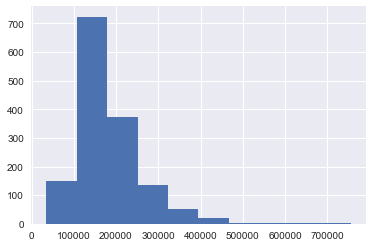

In [39]:
train['SalePrice'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021A4C97D4E0>]], dtype=object)

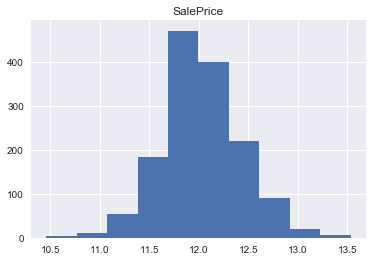

In [42]:
logSales = np.log(train['SalePrice'])
logSalesDf = pd.DataFrame({'SalePrice':logSales})
logSalesDf.hist()

In [43]:
train["SalePrice"] = np.log1p(train["SalePrice"])

In [49]:
reqColumns = train.columns.difference(['Id','SalePrice'])

combinedData = pd.concat((train.loc[:,reqColumns], test.loc[:,reqColumns]))

quantData = combinedData.dtypes[combinedData.dtypes != "object"].index

In [52]:
# Calculating Skewness of the overall Quantitative Data
skewedData = train[quantData].apply(lambda l: skew(l.dropna()))
skewedData

1stFlrSF          1.375342
2ndFlrSF          0.812194
3SsnPorch        10.293752
BedroomAbvGr      0.211572
BsmtFinSF1        1.683771
BsmtFinSF2        4.250888
BsmtFullBath      0.595454
BsmtHalfBath      4.099186
BsmtUnfSF         0.919323
EnclosedPorch     3.086696
Fireplaces        0.648898
FullBath          0.036524
GarageArea        0.179796
GarageCars       -0.342197
GarageYrBlt      -0.648708
GrLivArea         1.365156
HalfBath          0.675203
KitchenAbvGr      4.483784
LotArea          12.195142
LotFrontage       2.160866
LowQualFinSF      9.002080
MSSubClass        1.406210
MasVnrArea        2.666326
MiscVal          24.451640
MoSold            0.211835
OpenPorchSF       2.361912
OverallCond       0.692355
OverallQual       0.216721
PoolArea         14.813135
ScreenPorch       4.117977
TotRmsAbvGrd      0.675646
TotalBsmtSF       1.522688
WoodDeckSF        1.539792
YearBuilt        -0.612831
YearRemodAdd     -0.503044
YrSold            0.096170
dtype: float64

In [53]:
# Selecting Columns with Skewness > 0.80
skewedData = skewedData[skewedData > 0.80]
skewedData

1stFlrSF          1.375342
2ndFlrSF          0.812194
3SsnPorch        10.293752
BsmtFinSF1        1.683771
BsmtFinSF2        4.250888
BsmtHalfBath      4.099186
BsmtUnfSF         0.919323
EnclosedPorch     3.086696
GrLivArea         1.365156
KitchenAbvGr      4.483784
LotArea          12.195142
LotFrontage       2.160866
LowQualFinSF      9.002080
MSSubClass        1.406210
MasVnrArea        2.666326
MiscVal          24.451640
OpenPorchSF       2.361912
PoolArea         14.813135
ScreenPorch       4.117977
TotalBsmtSF       1.522688
WoodDeckSF        1.539792
dtype: float64

In [55]:
skewedData.index

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtHalfBath', 'BsmtUnfSF', 'EnclosedPorch', 'GrLivArea',
       'KitchenAbvGr', 'LotArea', 'LotFrontage', 'LowQualFinSF', 'MSSubClass',
       'MasVnrArea', 'MiscVal', 'OpenPorchSF', 'PoolArea', 'ScreenPorch',
       'TotalBsmtSF', 'WoodDeckSF'],
      dtype='object')

In [56]:
# Normalizing Skewed Data with Log transformation
combinedData[skewedData.index] = np.log1p(combinedData[skewedData.index]) # log1p to avoid error due to NaN data
combinedData[skewedData.index]

1stFlrSF  2ndFlrSF  3SsnPorch  BsmtFinSF1  BsmtFinSF2  BsmtHalfBath  \
0     2.048136  2.047835   0.000000    2.023008    0.000000      0.000000   
1     2.096943  0.000000   0.000000    2.065156    0.000000      0.526589   
2     2.057383  2.049631   0.000000    1.972450    0.000000      0.000000   
3     2.062933  2.032004   0.000000    1.853152    0.000000      0.000000   
4     2.084931  2.074473   0.000000    2.013056    0.000000      0.000000   
5     2.038731  1.993388   1.912714    2.027773    0.000000      0.000000   
6     2.132442  0.000000   0.000000    2.106882    0.000000      0.000000   
7     2.080730  2.065802   0.000000    2.048587    1.503301      0.000000   
8     2.070715  2.031310   0.000000    0.000000    0.000000      0.000000   
9     2.077297  0.000000   0.000000    2.047381    0.000000      0.000000   
10    2.072912  0.000000   0.000000    2.055423    0.000000      0.000000   
11    2.088873  2.084605   0.000000    2.067717    0.000000      0.000000   
12    2.056267  0.000000   0.000000    2.028667    0.000000      0.000000   
13    2.117445  0.000000   0.000000    0.000000    0.000000      0.000000   
14    2.096064  0.000000   0.000000    2.027952    0.000000      0.000000   
15    2.047835  0.000000   0.000000    0.000000    0.000000      0.000000   
16    2.068474  0.000000   0.000000    1.996237    0.000000      0.000000   
17    2.100201  0.000000   0.000000    0.000000    0.000000      0.000000   
18    2.081516  0.000000   0.000000    2.011209    0.000000      0.000000   
19    2.104186  0.000000   0.000000    1.977486    0.000000      0.000000   
20    2.086332  2.092578   0.000000    0.000000    0.000000      0.000000   
21    2.080842  0.000000   0.000000    0.000000    0.000000      0.000000   
22    2.139280  0.000000   0.000000    0.000000    0.000000      0.000000   
23    2.075304  0.000000   0.000000    2.045703    0.000000      0.000000   
24    2.075304  0.000000   0.000000    1.831260    2.015674      0.000000   
25    2.125655  0.000000   0.000000    0.000000    0.000000      0.000000   
26    2.054573  0.000000   0.000000    1.865565    1.972450      0.526589   
27    2.133139  0.000000   0.000000    2.092578    0.000000      0.000000   
28    2.125655  0.000000   0.000000    2.098392    0.000000      0.000000   
29    1.981794  0.000000   0.000000    0.000000    0.000000      0.000000   
...        ...       ...        ...         ...         ...           ...   
1429  2.010170  0.000000   0.000000    0.000000    0.000000      0.000000   
1430  2.063723  2.016270   0.000000    0.000000    0.000000      0.000000   
1431  2.027233  0.000000   0.000000    0.000000    0.000000      0.000000   
1432  2.075304  1.919872   0.000000    0.000000    0.000000      0.000000   
1433  1.995767  1.929908   0.000000    0.000000    0.000000      0.000000   
1434  2.138159  0.000000   0.000000    2.123623    0.000000      0.000000   
1435  2.129030  0.000000   0.000000    2.122937    0.000000      0.526589   
1436  2.127503  0.000000   0.000000    2.035417    0.000000      0.526589   
1437  2.130322  0.000000   0.000000    0.000000    0.000000      0.000000   
1438  2.117204  0.000000   0.000000    0.000000    0.000000      0.000000   
1439  2.091766  0.000000   0.000000    1.995767    0.000000      0.000000   
1440  2.129319  0.000000   0.000000    2.055846    0.000000      0.000000   
1441  2.109859  0.000000   0.000000    2.083950    1.751315      0.000000   
1442  2.149575  0.000000   0.000000    2.105182    0.000000      0.000000   
1443  2.142061  0.000000   0.000000    2.114259    0.000000      0.000000   
1444  2.125655  0.000000   0.000000    0.000000    0.000000      0.000000   
1445  2.106794  0.000000   0.000000    2.095080    0.000000      0.000000   
1446  2.004835  2.019591   0.000000    0.000000    0.000000      0.000000   
1447  2.050814  0.000000   0.000000    1.958870    0.000000      0.000000   
1448  2.129463  0.000000   0.000000    1.793530    0.000000      0.000000   
14

In [57]:
combinedData = pd.get_dummies(combinedData)
combinedData

1stFlrSF  2ndFlrSF  3SsnPorch  BedroomAbvGr  BsmtFinSF1  BsmtFinSF2  \
0     2.048136  2.047835   0.000000             3    2.023008    0.000000   
1     2.096943  0.000000   0.000000             3    2.065156    0.000000   
2     2.057383  2.049631   0.000000             3    1.972450    0.000000   
3     2.062933  2.032004   0.000000             3    1.853152    0.000000   
4     2.084931  2.074473   0.000000             4    2.013056    0.000000   
5     2.038731  1.993388   1.912714             1    2.027773    0.000000   
6     2.132442  0.000000   0.000000             3    2.106882    0.000000   
7     2.080730  2.065802   0.000000             3    2.048587    1.503301   
8     2.070715  2.031310   0.000000             2    0.000000    0.000000   
9     2.077297  0.000000   0.000000             2    2.047381    0.000000   
10    2.072912  0.000000   0.000000             3    2.055423    0.000000   
11    2.088873  2.084605   0.000000             4    2.067717    0.000000   
12    2.056267  0.000000   0.000000             2    2.028667    0.000000   
13    2.117445  0.000000   0.000000             3    0.000000    0.000000   
14    2.096064  0.000000   0.000000             2    2.027952    0.000000   
15    2.047835  0.000000   0.000000             2    0.000000    0.000000   
16    2.068474  0.000000   0.000000             2    1.996237    0.000000   
17    2.100201  0.000000   0.000000             2    0.000000    0.000000   
18    2.081516  0.000000   0.000000             3    2.011209    0.000000   
19    2.104186  0.000000   0.000000             3    1.977486    0.000000   
20    2.086332  2.092578   0.000000             4    0.000000    0.000000   
21    2.080842  0.000000   0.000000             3    0.000000    0.000000   
22    2.139280  0.000000   0.000000             3    0.000000    0.000000   
23    2.075304  0.000000   0.000000             3    2.045703    0.000000   
24    2.075304  0.000000   0.000000             3    1.831260    2.015674   
25    2.125655  0.000000   0.000000             3    0.000000    0.000000   
26    2.054573  0.000000   0.000000             3    1.865565    1.972450   
27    2.133139  0.000000   0.000000             3    2.092578    0.000000   
28    2.125655  0.000000   0.000000             2    2.098392    0.000000   
29    1.981794  0.000000   0.000000             1    0.000000    0.000000   
...        ...       ...        ...           ...         ...         ...   
1429  2.010170  0.000000   0.000000             2    0.000000    0.000000   
1430  2.063723  2.016270   0.000000             4    0.000000    0.000000   
1431  2.027233  0.000000   0.000000             2    0.000000    0.000000   
1432  2.075304  1.919872   0.000000             4    0.000000    0.000000   
1433  1.995767  1.929908   0.000000             2    0.000000    0.000000   
1434  2.138159  0.000000   0.000000             2    2.123623    0.000000   
1435  2.129030  0.000000   0.000000             2    2.122937    0.000000   
1436  2.127503  0.000000   0.000000             3    2.035417    0.000000   
1437  2.130322  0.000000   0.000000             4    0.000000    0.000000   
1438  2.117204  0.000000   0.000000             3    0.000000    0.000000   
1439  2.091766  0.000000   0.000000             3    1.995767    0.000000   
1440  2.129319  0.000000   0.000000             2    2.055846    0.000000   
1441  2.109859  0.000000   0.000000             2    2.083950    1.751315   
1442  2.149575  0.000000   0.000000             3    2.105182    0.000000   
1443  2.142061  0.000000   0.000000             3    2.114259    0.000000   
1444  2.125655  0.000000   0.000000             3    0.000000    0.000000   
1445  2.106794  0.000000   0.000000             2    2.095080    0.000000   
1446  2.004835  2.019591   0.000000             3    0.000000    0.000000   
1447  2.050814  0.000000   0.000000             3    1.958870    0.000000   
1448  2.129463  0.000000   0.000000             4    1.793530    0.000000   
14

In [58]:
combinedData = combinedData.fillna(combinedData.mean())
combinedData

1stFlrSF  2ndFlrSF  3SsnPorch  BedroomAbvGr  BsmtFinSF1  BsmtFinSF2  \
0     2.048136  2.047835   0.000000             3    2.023008    0.000000   
1     2.096943  0.000000   0.000000             3    2.065156    0.000000   
2     2.057383  2.049631   0.000000             3    1.972450    0.000000   
3     2.062933  2.032004   0.000000             3    1.853152    0.000000   
4     2.084931  2.074473   0.000000             4    2.013056    0.000000   
5     2.038731  1.993388   1.912714             1    2.027773    0.000000   
6     2.132442  0.000000   0.000000             3    2.106882    0.000000   
7     2.080730  2.065802   0.000000             3    2.048587    1.503301   
8     2.070715  2.031310   0.000000             2    0.000000    0.000000   
9     2.077297  0.000000   0.000000             2    2.047381    0.000000   
10    2.072912  0.000000   0.000000             3    2.055423    0.000000   
11    2.088873  2.084605   0.000000             4    2.067717    0.000000   
12    2.056267  0.000000   0.000000             2    2.028667    0.000000   
13    2.117445  0.000000   0.000000             3    0.000000    0.000000   
14    2.096064  0.000000   0.000000             2    2.027952    0.000000   
15    2.047835  0.000000   0.000000             2    0.000000    0.000000   
16    2.068474  0.000000   0.000000             2    1.996237    0.000000   
17    2.100201  0.000000   0.000000             2    0.000000    0.000000   
18    2.081516  0.000000   0.000000             3    2.011209    0.000000   
19    2.104186  0.000000   0.000000             3    1.977486    0.000000   
20    2.086332  2.092578   0.000000             4    0.000000    0.000000   
21    2.080842  0.000000   0.000000             3    0.000000    0.000000   
22    2.139280  0.000000   0.000000             3    0.000000    0.000000   
23    2.075304  0.000000   0.000000             3    2.045703    0.000000   
24    2.075304  0.000000   0.000000             3    1.831260    2.015674   
25    2.125655  0.000000   0.000000             3    0.000000    0.000000   
26    2.054573  0.000000   0.000000             3    1.865565    1.972450   
27    2.133139  0.000000   0.000000             3    2.092578    0.000000   
28    2.125655  0.000000   0.000000             2    2.098392    0.000000   
29    1.981794  0.000000   0.000000             1    0.000000    0.000000   
...        ...       ...        ...           ...         ...         ...   
1429  2.010170  0.000000   0.000000             2    0.000000    0.000000   
1430  2.063723  2.016270   0.000000             4    0.000000    0.000000   
1431  2.027233  0.000000   0.000000             2    0.000000    0.000000   
1432  2.075304  1.919872   0.000000             4    0.000000    0.000000   
1433  1.995767  1.929908   0.000000             2    0.000000    0.000000   
1434  2.138159  0.000000   0.000000             2    2.123623    0.000000   
1435  2.129030  0.000000   0.000000             2    2.122937    0.000000   
1436  2.127503  0.000000   0.000000             3    2.035417    0.000000   
1437  2.130322  0.000000   0.000000             4    0.000000    0.000000   
1438  2.117204  0.000000   0.000000             3    0.000000    0.000000   
1439  2.091766  0.000000   0.000000             3    1.995767    0.000000   
1440  2.129319  0.000000   0.000000             2    2.055846    0.000000   
1441  2.109859  0.000000   0.000000             2    2.083950    1.751315   
1442  2.149575  0.000000   0.000000             3    2.105182    0.000000   
1443  2.142061  0.000000   0.000000             3    2.114259    0.000000   
1444  2.125655  0.000000   0.000000             3    0.000000    0.000000   
1445  2.106794  0.000000   0.000000             2    2.095080    0.000000   
1446  2.004835  2.019591   0.000000             3    0.000000    0.000000   
1447  2.050814  0.000000   0.000000             3    1.958870    0.000000   
1448  2.129463  0.000000   0.000000             4    1.793530    0.000000   
14

In [60]:
missingData = combinedData.isnull().sum()
missingData

1stFlrSF                 0
2ndFlrSF                 0
3SsnPorch                0
BedroomAbvGr             0
BsmtFinSF1               0
BsmtFinSF2               0
BsmtFullBath             0
BsmtHalfBath             0
BsmtUnfSF                0
EnclosedPorch            0
Fireplaces               0
FullBath                 0
GarageArea               0
GarageCars               0
GarageYrBlt              0
GrLivArea                0
HalfBath                 0
KitchenAbvGr             0
LotArea                  0
LotFrontage              0
LowQualFinSF             0
MSSubClass               0
MasVnrArea               0
MiscVal                  0
MoSold                   0
OpenPorchSF              0
OverallCond              0
OverallQual              0
PoolArea                 0
ScreenPorch              0
                        ..
RoofMatl_Metal           0
RoofMatl_Roll            0
RoofMatl_Tar&Grv         0
RoofMatl_WdShake         0
RoofMatl_WdShngl         0
RoofStyle_Flat           0
R

In [61]:
missingData = missingData[missingData > 0]
missingData

Series([], dtype: int64)